<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Sale <br>
**Notebook 3: Model Tuning & Kaggle Submission**

# TABLE OF CONTENTS

**1. Data Cleaning** <br>
**2. EDA & Baseline Model** <br>
**3. Model Tuning & Kaggle Submission (This Notebook)** <br>
- [01. Library and Data Import](#01.-LIBRARY-AND-DATA-IMPORT) <br>
- [02. Data Overview](#02.-DATA-OVERVIEWS) <br>
- [03. Feature Engineering](#03.-FEATURE-ENGINEERING) <br>
- [04. Final Model](#04.-FINAL-MODEL) <br>
- [05. Kaggle Submission](#05.-KAGGLE-SUBMISSION) <br>
- [06. Project Summary](#06.-PROJECT-SUMMARY) <br>

# 01. LIBRARY AND DATA IMPORT

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import sklearn libraries

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [3]:
# import datasets
df_test = pd.read_csv('../datasets/test_cleaned_1.csv')
df = pd.read_csv('../datasets/train_cleaned_2.csv')

# 02. DATA OVERVIEWS

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,0.0,13517,Pave,N.A.,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,N.A.,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,N.A.,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,N.A.,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,N.A.,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,N.A.,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,8,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,N.A.,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,N.A.,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,N.A.,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,8,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,N.A.,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,N.A.,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,N.A.,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,8,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,N.A.,0,3,2010,WD,138500


**Summary of Baseline Model Score:** <br>
|No |Test Type | Train Score | Test Score | CrossVal R2 Score | RMSE Score | Remarks |
| --- | --- | --- | --- | --- | --- | --- |
|1. |Linear Regression | 0.936 | -9.8e+23 | -6.6e+22 | 7.7e+16 | Poor Performance |
|2. |Lasso | 0.929 | 0.903 | 0.908 | 24167 | To use for model tuning |
|3. |Ridge | 0.931 | 0.898 | 0.906 | 24718 | To use for model tuning |
|4. |ElasticNet | 0.929 | 0.903 | 0.908 | 24163 | Similar to Lasso (l1 ratio = 1) |

# 03. FEATURE ENGINEERING

## A. POLYNOMIAL

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

In [7]:
nominal_df = df[['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
                 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']].copy()

In [8]:
poly_df = df.copy()
poly_df = poly_df.drop(columns = nominal_df.columns)
poly_df = poly_df.drop(columns = 'SalePrice')

In [9]:
X = df[poly_df.columns]
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(poly_df.columns))
X_poly["SalePrice"] = df["SalePrice"]

In [10]:
X_poly.corr()['SalePrice'].sort_values(ascending = False).head()

SalePrice                   1.000000
Overall Qual Gr Liv Area    0.873846
Exter Qual Gr Liv Area      0.854521
Gr Liv Area Kitchen Qual    0.845403
Bsmt Qual Gr Liv Area       0.843345
Name: SalePrice, dtype: float64

**Observations:** <br>
As shown from the correlation chart, 'Overall Qual' with 'SalePrice' and 'Gr Liv Area' with 'SalePrice' correlation are less than 0.84. <br>
By multiplying 'Overall Qual' with 'Gr Liv Area', we are able to achieve higher correlation value with SalePrice at 0.87

In [11]:
df['HouseArea*HouseQual'] = df['Overall Qual'] * df['Gr Liv Area']
df.drop(columns = ['Overall Qual', 'Gr Liv Area'], inplace = True)

In [12]:
poly_df = df.copy()
poly_df = poly_df.drop(columns = nominal_df.columns)
poly_df = poly_df.drop(columns = 'SalePrice')

In [13]:
X = df[poly_df.columns]
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(poly_df.columns))
X_poly["SalePrice"] = df["SalePrice"]

In [14]:
X_poly.corr()['SalePrice'].sort_values(ascending = False).head()

SalePrice                            1.000000
Kitchen Qual HouseArea*HouseQual     0.906330
Bsmt Qual HouseArea*HouseQual        0.905861
Exter Qual HouseArea*HouseQual       0.905392
Total Bsmt SF HouseArea*HouseQual    0.889535
Name: SalePrice, dtype: float64

**Observations:** Continue with the polynomial feature by multiplying 'HouseArea*HouseQual' with 'Kitchen Qual' to improve the correlation from 0.87 to 0.906 (include KitchenQual as HouseQual)

In [15]:
df['HouseArea*HouseQual'] = df['HouseArea*HouseQual'] * df['Kitchen Qual']
df.drop(columns = ['Kitchen Qual'], inplace = True)

In [16]:
poly_df = df.copy()
poly_df = poly_df.drop(columns = nominal_df.columns)
poly_df = poly_df.drop(columns = 'SalePrice')

In [17]:
X = df[poly_df.columns]
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(poly_df.columns))
X_poly["SalePrice"] = df["SalePrice"]

In [18]:
X_poly.corr()['SalePrice'].sort_values(ascending = False).head()

SalePrice                            1.000000
Bsmt Qual HouseArea*HouseQual        0.913929
Year Built HouseArea*HouseQual       0.909479
Electrical HouseArea*HouseQual       0.908432
Garage Yr Blt HouseArea*HouseQual    0.908326
Name: SalePrice, dtype: float64

**Observations:** Continue with the polynomial feature by multiplying 'HouseArea*HouseQual' with 'Bsmt Qual Overall' to improve the correlation from 0.906 to 0.913

In [19]:
df['HouseArea*HouseQual'] = df['HouseArea*HouseQual'] * df['Bsmt Qual']
df.drop(columns = ['Bsmt Qual'], inplace = True)

In [20]:
poly_df = df.copy()
poly_df = poly_df.drop(columns = nominal_df.columns)
poly_df = poly_df.drop(columns = 'SalePrice')

In [21]:
X = df[poly_df.columns]
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(poly_df.columns))
X_poly["SalePrice"] = df["SalePrice"]

In [22]:
X_poly.corr()['SalePrice'].sort_values(ascending = False).head()

SalePrice                             1.000000
Paved Drive HouseArea*HouseQual       0.915144
Electrical HouseArea*HouseQual        0.914759
Year Remod/Add HouseArea*HouseQual    0.914167
Year Built HouseArea*HouseQual        0.914158
Name: SalePrice, dtype: float64

**Observations:** We can observe that the correlation value does not increase much anymore ~0.913 to ~0.915, hence we can stop the polynomial iteration at this point.

## B. MISCELLANEOUS

- Combine all bathrooms into 1 feature

In [23]:
df["Bathroom"] = df["Bsmt Full Bath"] + df["Bsmt Half Bath"]*0.5 + df["Full Bath"] + df["Half Bath"]*0.5
df.drop(columns = ["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"], inplace = True)

- Express the property "Year Built" in terms of "Age"

In [24]:
df['House Age'] = 2010 - df['Year Built']
df.drop(columns = ['Year Built'], inplace = True)

- 'TotRms AbvGrd': Total rooms above grade (does not include bathrooms)
- Which indicates that this feature already include 'Bedroom AbvGr', 'Kitchen AbvGr'
- Hence, we shall drop these 2 features

In [25]:
df.drop(columns = ['Bedroom AbvGr', 'Kitchen AbvGr'], inplace = True)

- Misc Feature (Nominal): Miscellaneous feature not covered in other categories
- Misc Val (Continuous): $Value of miscellaneous feature
- These features should be dropped as the Miscellaneous Feature is already included in the SalePrice.

In [26]:
df.drop(columns = ['Misc Val', 'Misc Feature'], inplace = True)
nominal_df = nominal_df.drop(columns = ['Misc Feature'])

# 04. FINAL MODEL

## A. Define features category

In [27]:
# Define X & y
# Dummify nominal variables as before and assign it to X

X = pd.get_dummies(df, columns = nominal_df.columns, drop_first=True)
X = X.drop(columns = "SalePrice")
y = df["SalePrice"]

In [28]:
# Preview X
X.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Mo Sold,Yr Sold,HouseArea*HouseQual,Bathroom,House Age,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_N.A.,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_N.A.,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_N.A.,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,13517,3,4,3,8,2005,289.0,4,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,725,754,0,6,8,0,0,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,3,2010,106488,2.5,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,3,4,3,5,1997,132.0,4,3,3,1,6,637.0,1,0.0,276.0,913.0,5,5,913,1209,0,8,8,1,3,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,4,2009,237664,3.5,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0

## B. Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## C. Transform

In [30]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## D. Instantiate & Fit Models

In [31]:
lasso_params = {"alpha" : np.logspace(1, 3, 50),
                "fit_intercept" : [True, False]}

In [32]:
lasso = GridSearchCV(Lasso(), lasso_params, n_jobs = -1, verbose = 1, cv = 5)
lasso.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([  10.        ,   10.98541142,   12.06792641,   13.25711366,
         14.56348478,   15.9985872 ,   17.57510625,   19.30697729,
         21.20950888,   23.29951811,   25.59547923,   28.11768698,
         30.88843596,   33.93221772,   37.2759372 ,   40.94915062,
         44.98432669,   49.41713361,   54.28675439,   59.63623317,
         65.51285569,   71.9685673 ,   79.06043211,   86.85113738,
         95.40954763,  104.81131342,  115.13953993,  126.48552169,
        138.94954944,  152.64179672,  167.68329368,  184.20699693,
        202.35896477,  222.29964825,  244.20530945,  268.26957953,
        294.70517026,  323.74575428,  355.64803062,  390.69399371,
        429.19342601,  471.48663635,  517.94746792,  568.9866029 ,
        625.05519253,  686.648845  ,  754.31200634,  828.64277285,
        910.29817799, 1000.        ]),
                         'fit_intercept': [True, False]},
             verbose=1)

In [33]:
ridge_params = {"alpha" : np.logspace(.1, 2, 50),
                "fit_intercept" : [True, False]}

In [34]:
ridge = GridSearchCV(Ridge(), ridge_params, n_jobs = -1, verbose = 1, cv = 5)
ridge.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.25892541,   1.37649776,   1.50505032,   1.64560853,
         1.79929362,   1.96733152,   2.15106266,   2.35195264,
         2.57160393,   2.8117687 ,   3.0743627 ,   3.36148062,
         3.67541279,   4.01866341,   4.39397056,   4.80432804,
         5.25300922,   5.74359321,   6.27999335,   6.86648845,
         7.50775694,   8.20891416,   8.97555318,   9.81378942,
        10.73030941,  11.73242415,  12.82812743,  14.02615957,
        15.33607719,  16.76832937,  18.33434107,  20.04660423,
        21.91877742,  23.96579481,  26.20398529,  28.6512027 ,
        31.32696828,  34.25262639,  37.45151475,  40.94915062,
        44.77343434,  48.95487189,  53.52681823,  58.52574339,
        63.99152336,  69.96775821,  76.50211983,  83.64673228,
        91.4585875 , 100.        ]),
                         'fit_intercept': [True, False]},
             verbose=1)

## E. Cross Validation

In [35]:
lasso_CV_scores = cross_val_score(lasso, X_train, y_train, cv=5)
round(lasso_CV_scores.mean(),3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.925

In [36]:
ridge_CV_scores = cross_val_score(ridge, X_train, y_train, cv=5)
round(ridge_CV_scores.mean(),3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.921

## F. Model Evaluation

### I. LASSO

In [37]:
y_preds_lasso = lasso.predict(X_test)

In [38]:
print(f"Lasso Train Score: {round(lasso.score(X_train, y_train),3)}")
print(f"Lasso Test Score: {round(lasso.score(X_test, y_test),3)}")
print(f"Lasso RMSE: {round(metrics.mean_squared_error(y_test, y_preds_lasso, squared=False),3)}")

Lasso Train Score: 0.942
Lasso Test Score: 0.92
Lasso RMSE: 21991.442


In [39]:
lasso.best_params_

{'alpha': 471.486636345739, 'fit_intercept': True}

In [40]:
print(f"Lasso coefficient: {round(lasso.best_estimator_.alpha, 3)}")

Lasso coefficient: 471.487


In [41]:
dict(zip(X.columns, lasso.best_estimator_.coef_))

{'Lot Frontage': 1068.6147616990297,
 'Lot Area': 4858.6642337546455,
 'Lot Shape': -0.0,
 'Utilities': 0.0,
 'Land Slope': -0.0,
 'Overall Cond': 5556.286206713956,
 'Year Remod/Add': 1611.008760365472,
 'Mas Vnr Area': 2427.6855366873165,
 'Exter Qual': 1710.8075416509564,
 'Exter Cond': -0.0,
 'Bsmt Cond': -1692.0589613783445,
 'Bsmt Exposure': 2569.47261260245,
 'BsmtFin Type 1': 0.0,
 'BsmtFin SF 1': 6327.316788725356,
 'BsmtFin Type 2': 0.0,
 'BsmtFin SF 2': 162.88967837437414,
 'Bsmt Unf SF': -0.0,
 'Total Bsmt SF': 3812.1024884809885,
 'Heating QC': 1697.623420362754,
 'Electrical': 0.0,
 '1st Flr SF': 10627.523518355423,
 '2nd Flr SF': 6521.605135578245,
 'Low Qual Fin SF': 0.0,
 'TotRms AbvGrd': 0.0,
 'Functional': 3689.438606954913,
 'Fireplaces': 1286.7879020216958,
 'Fireplace Qu': 1910.7149382864343,
 'Garage Yr Blt': 0.0,
 'Garage Finish': 0.0,
 'Garage Cars': 0.0,
 'Garage Area': 4628.16157484859,
 'Garage Qual': 0.0,
 'Garage Cond': -0.0,
 'Paved Drive': 951.6694397333

### II. RIDGE

In [42]:
y_preds_ridge = ridge.predict(X_test)

In [43]:
print(f"Ridge Train Score: {round(ridge.score(X_train, y_train),3)}")
print(f"Ridge Test Score: {round(ridge.score(X_test, y_test),3)}")
print(f"Ridge RMSE: {round(metrics.mean_squared_error(y_test, y_preds_ridge, squared=False),3)}")

Ridge Train Score: 0.946
Ridge Test Score: 0.913
Ridge RMSE: 22854.239


In [44]:
ridge.best_params_

{'alpha': 76.502119832752, 'fit_intercept': True}

In [45]:
print(f"Ridge coefficient: {round(ridge.best_estimator_.alpha, 3)}")

Ridge coefficient: 76.502


### III. Model Review & Summary

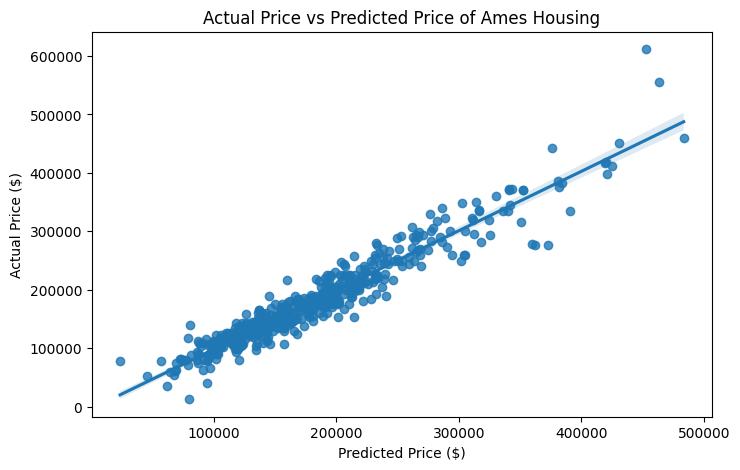

In [46]:
# Chart comparing actual price with predicted price
plt.figure(figsize = (8, 5))
sns.regplot(y = y_test, x = y_preds_lasso)
plt.title('Actual Price vs Predicted Price of Ames Housing')
plt.ylabel('Actual Price ($)')
plt.xlabel('Predicted Price ($)');

**Observations:** <br>
The model are quite accurate in predicting house price under $400,000. However it starts to have larger margin of error for more expensive houses. This is expected as there's only 46 houses (2.2%) are priced more than 400,000 in the original dataset. To improve our models, more houses with SalePrice above 400,000 should be incorporated.

In [47]:
X['SalePrice'] = df['SalePrice']

In [48]:
features_corr = X.corr()['SalePrice'].sort_values(ascending = False)
features_corr = features_corr.to_frame(name = 'Correlation')
top_features_corr = features_corr[((features_corr['Correlation'] > 0.646) | (features_corr['Correlation'] <-0.29)) & (features_corr['Correlation'] != 1)]
X = X.drop(columns = ['SalePrice'])

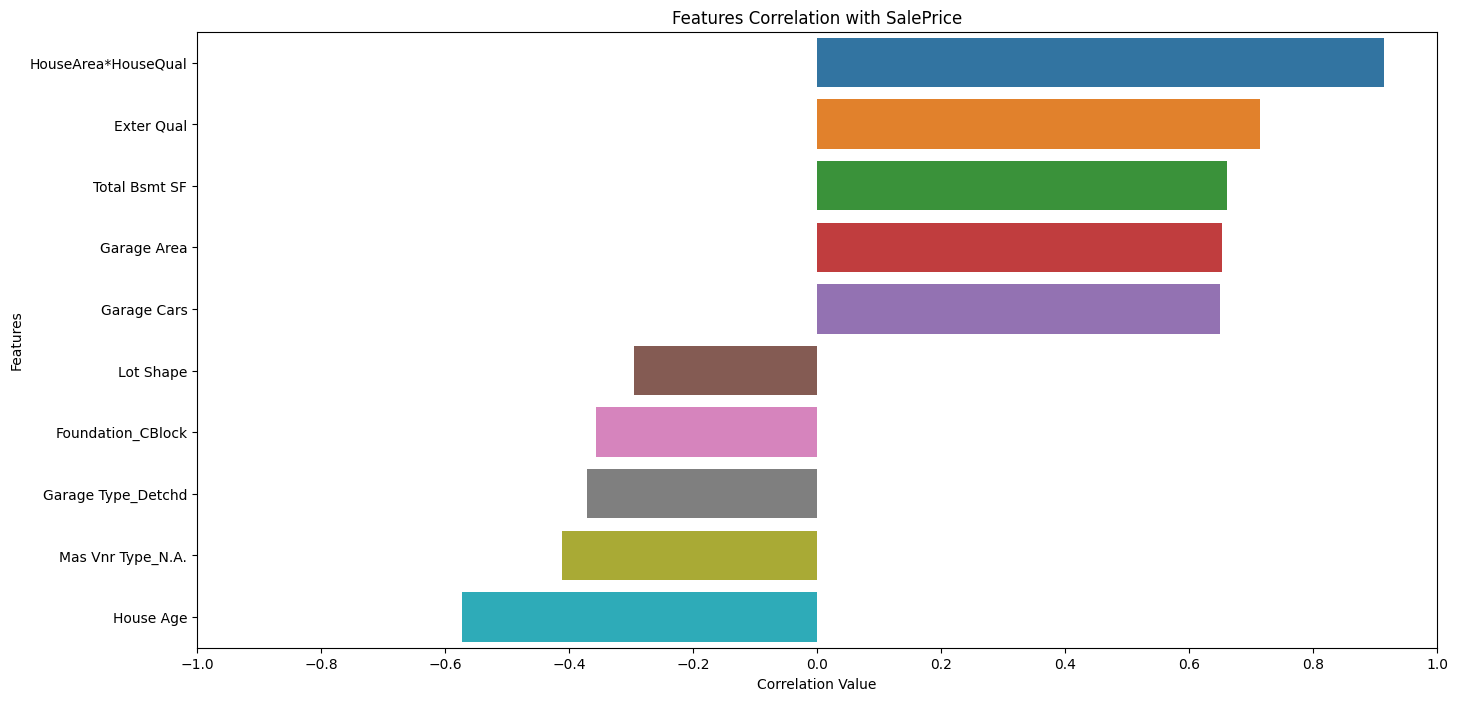

In [49]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data = top_features_corr , y = top_features_corr.index, x = 'Correlation')
ax.set_ylabel('Features')
ax.set_xlabel('Correlation Value')
ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_title('Features Correlation with SalePrice')
plt.show()

The graph above shows the top 5 feature correlate positively & negatively with the SalePrice. As 'HouseQual' consists of 'Overall Qual', 'Kitchen Qual' and 'Bsmt Qual', hence the top 5 & bottom 5 features are:
- **Positive Correlations**: House Area, House Quality (Overall Quality, Kitchen Quality, Basement Quality) and External Quality
- **Negative Correlations**: House Age, N.A. Mas Vnr Type, Detatched Garage Type, CBlock Foundation, and Lot Shape

In [50]:
lasso_coef = lasso.best_estimator_.coef_
lasso_coef = pd.DataFrame(lasso_coef, columns = ['Coefficient'])
lasso_coef['Feature'] = X.columns

In [51]:
lasso_zerocoef = lasso_coef[lasso_coef['Coefficient'] == 0]

In [52]:
lasso_zerocoef['Feature'].to_list()

['Lot Shape',
 'Utilities',
 'Land Slope',
 'Exter Cond',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Bsmt Unf SF',
 'Electrical',
 'Low Qual Fin SF',
 'TotRms AbvGrd',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Qual',
 'Garage Cond',
 'Pool Area',
 'Pool QC',
 'Mo Sold',
 'Yr Sold',
 'MS SubClass_30',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_60',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_180',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Alley_Pave',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Lot Config_FR2',
 'Lot Config_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition 1_Feedr',
 'Condition 1_R

**Observations:** <br>
Some features such as: 'Lot Shape', 'Utilities',  'Land Slope', 'Exter Cond','BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Unf SF', 'Electrical', 'Low Qual Fin SF','TotRms AbvGrd', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',  'Garage Qual', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Pool QC', 'Mo Sold', 'Yr Sold' has Lasso Coefficient of 0. These features are either: 1. Are features that are already accounted for in other features, or 2. Does not affect SalePrice.

**Summary of Baseline Model Score:** <br>
|No |Test Type | Train Score | Test Score | CrossVal R2 Score | RMSE Score | Remarks |
| --- | --- | --- | --- | --- | --- | --- |
|1. |Linear Regression | 0.936 | -9.8e+23 | -6.6e+22 | 7.7e+16 | Poor Performance |
|2. |Lasso | 0.929 | 0.903 | 0.908 | 24167 | To use for model tuning |
|3. |Ridge | 0.931 | 0.898 | 0.906 | 24718 | To use for model tuning |
|4. |ElasticNet | 0.929 | 0.903 | 0.908 | 24163 | Similar to Lasso (l1 ratio = 1) |

**Summary of Tuned Model Score:** <br>
|No | Model | Test Type | Train Score | Test Score | CrossVal R2 Score | RMSE Score | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
|1. | Tuned Model | Lasso | 0.942 | 0.920 | 0.925 | 21991 | Selected For Kaggle Submission |
|2. | Tuned Model | Ridge | 0.946 | 0.913 | 0.921 | 22854 | - |

**Selected Model:**
- Tuned Lasso & Ridge Model has  ~2% increase in Train, Test and CrossVal R2 Score.
- Ridge Model has slightly higher Train score, but has higher RMSE score.
- Tuned Lasso Model is selected for Kaggle Submission as it has the lowest RMSE score.
- The final model is slightly overfit (~2.2%)

# 05. KAGGLE SUBMISSION

## A. Predict Testing SalePrice

In [53]:
df_test['HouseArea*HouseQual'] = df_test['Gr Liv Area'] * df_test['Overall Qual'] * df_test['Kitchen Qual'] * df_test['Bsmt Qual']
df_test.drop(columns = ['Overall Qual', 'Gr Liv Area', 'Kitchen Qual', 'Bsmt Qual'], inplace = True)

df_test["Bathroom"] = df_test["Bsmt Full Bath"] + df_test["Bsmt Half Bath"]*0.5 + df_test["Full Bath"] + df_test["Half Bath"]*0.5
df_test.drop(columns = ["Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath"], inplace = True)

df_test['House Age'] = 2010 - df_test['Year Built']
df_test.drop(columns = ['Year Built'], inplace = True)

In [54]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,HouseArea*HouseQual,Bathroom,House Age
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,8,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,3,1,1,0,1,0,1020,1020,GasA,4,N,2,908,1020,0,4,2,9,8,0,0,Detchd,1910.0,1,1,440,1,1,3,0,60,112,0,0,0,0,0,N.A.,0,4,2006,WD,46272,2.0,100
1,2718,905108090,90,RL,0.0,9662,Pave,N.A.,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,4,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3,1,1,0,1,0,1967,1967,GasA,3,Y,5,1967,0,0,6,2,10,8,0,0,Attchd,1977.0,3,2,580,3,3,3,170,0,0,0,0,0,0,0,N.A.,0,8,2006,WD,118020,2.0,33
2,2414,528218130,60,RL,58.0,17104,Pave,N.A.,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,5,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,6,554,1,0,100,654,GasA,5,Y,5,664,832,0,3,1,7,8,1,4,Attchd,2006.0,2,2,426,3,3,3,100,24,0,0,0,0,0,0,N.A.,0,9,2006,New,167552,3.5,4
3,1989,902207150,30,RM,60.0,8520,Pave,N.A.,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,6,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,1,1,0,1,0,968,968,GasA,3,Y,5,968,0,0,2,1,5,8,0,0,Detchd,1935.0,1,2,480,2,3,1,0,0,184,0,0,0,0,0,N.A.,0,7,2007,WD,43560,1.0,87
4,625,535105100,20,RL,0.0,9500,Pave,N.A.,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,3,1,4,609,1,0,785,1394,GasA,4,Y,5,1394,0,0,3,1,6,8,2,4,Attchd,1963.0,2,2,514,3,3,3,0,76,0,0,185,0,0,0,N.A.,0,7,2009,WD,100368,2.5,47


In [55]:
# Define X
# Drop 'Id', Dummify nominal variables as before and assign it to X

X_kaggle = df_test.copy()
X_kaggle = X_kaggle.drop(columns = 'Id')
X_kaggle = pd.get_dummies(df_test, columns = nominal_df.columns, drop_first=True)

In [56]:
# Add features seen in Train dataset but not in Test dataset

X_kaggle['MS SubClass_150'] = 0
X_kaggle['MS Zoning_C (all)'] = 0
X_kaggle['Neighborhood_GrnHill'] = 0
X_kaggle['Neighborhood_Landmrk'] = 0
X_kaggle['Condition 2_Feedr'] = 0
X_kaggle['Condition 2_PosN'] = 0
X_kaggle['Condition 2_RRAe'] = 0
X_kaggle['Condition 2_RRAn'] = 0
X_kaggle['Condition 2_RRNn'] = 0
X_kaggle['Roof Matl_Membran'] = 0
X_kaggle['Exterior 1st_CBlock'] = 0
X_kaggle['Exterior 1st_ImStucc'] = 0
X_kaggle['Exterior 1st_Stone'] = 0
X_kaggle['Exterior 2nd_Stone'] = 0
X_kaggle['Heating_OthW'] = 0
X_kaggle['Heating_Wall'] = 0
X_kaggle['Misc Feature_TenC'] = 0

In [57]:
# re-order the column according to or train/test dataset
X_kaggle = X_kaggle[X.columns]

In [58]:
X_kaggle.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Mo Sold,Yr Sold,HouseArea*HouseQual,Bathroom,House Age,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_N.A.,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_N.A.,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_N.A.,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,69.0,9142,4,4,3,8,1950,0.0,3,2,3,1,1,0,1,0,1020,1020,4,2,908,1020,0,9,8,0,0,1910.0,1,1,440,1,1,3,0,60,112,0,0,0,0,0,4,2006,46272,2.0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0.0,9662,3,4,3,4,1977,0.0,3,3,3,1,1,0,1,0,1967,1967,3,5,1967,0,0,10,8,0,0,1977.0,3,2,580,3,3,3,170,0,0,0,0,0,0,0,8,2006,118020,2.0,33,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [59]:
X_kaggle = ss.transform(X_kaggle)

In [60]:
y_kaggle = lasso.predict(X_kaggle)

In [61]:
df_test['SalePrice'] = y_kaggle

In [62]:
kaggle_submission = df_test[['Id', 'SalePrice']]

In [63]:
kaggle_submission.head()

,Id,SalePrice
0,2658,126507.000077
1,2718,166903.273880
2,2414,214372.380024
3,1989,105769.720508
4,625,178962.133709


## B. EDA of Predicted SalePrice

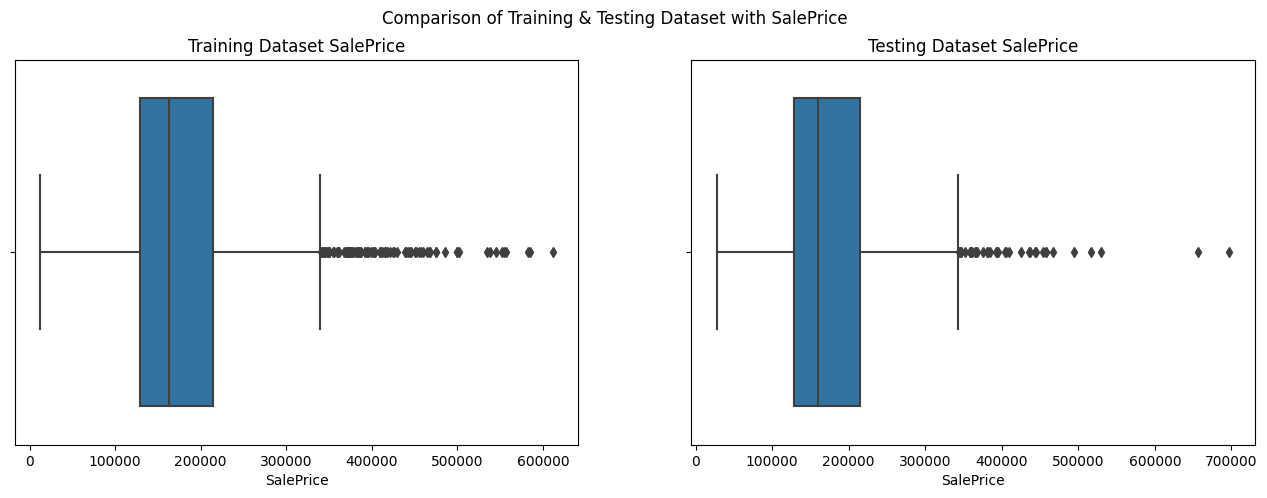

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))

sns.boxplot(x = df["SalePrice"], ax = ax[0]).set(title='Training Dataset SalePrice')
sns.boxplot(x = kaggle_submission["SalePrice"], ax = ax[1]).set(title='Testing Dataset SalePrice')
fig.suptitle('Comparison of Training & Testing Dataset with SalePrice');

**Observations:** <br>
As shown in the two graph above, the mean saleprice for both training and testing dataset are around 180,000. <br>
However, the maximum price of our training dataset is ~600,000 while the maximum price of our testing dataset is around ~700,000. <br>
This results are kind of expected as our model is not good at predicting house prices more than 400,000.

## C. Export to CSV

In [66]:
# Export data to csv for submission
kaggle_submission.to_csv('../datasets/kaggle_submission.csv', index=False)

## D. Kaggle Submission Results

**Kaggle Submission Score:**
- Private Score: 20833 (Top 20 in Leaderboard)
- Public Score: 22350 (Top 10 in Leaderboard) <br>

# 06. PROJECT SUMMARY

## A. Conclusion

To summarize, Ames Housing Price is best predicted using Lasso Regression with Polynomial Feature, with final RMSE score of 21991, and the top 5 features that positively drives the SalePrices are: Ground Living Area, Overall Quality, Kitchen Quality, Basement Quality and External Quality. The top 5 features that negatively drives the SalePrices are: House Age, N.A. Mas Vnr Type, Detatched Garage Type, CBlock Foundation, and Lot Shape.<Br>

The features that IowaGuru should collect from clients for future house listings are as follows:

| No | Features | Categories | Data Type | Description |
| --- | --- | --- | --- | --- |
| 1 | MS Subclass | Nominal | int64 | Identifies the type of dwelling involved in the sale. |
| 2 |  MS Zoning | Nominal | object | Identifies the general zoning classification of the sale. |
| 3 | Lot Frontage | Numeric | float64 | Linear feet of street connected to property |
| 4 | Lot Area | Numeric | int64 | Lot size in square feet |
| 5 | Street | Nominal | object | Type of road access to property |
| 6 | Alley | Nominal | object | Type of alley access to property |
| 7 | Land Countour | Nominal | object | Flatness of the property |
| 8 | Land Config | Nominal | object | Lot configuration |
| 9 | Neighborhood | Nominal | object | Physical locations within Ames city limits |
| 10 | Condition 1 | Nominal | object | Proximity to various conditions |
| 11 | Condition 2 | Nominal | object | Proximity to various conditions (if more than one is present) |
| 12 | Bldg Type | Nominal | object | Type of dwelling |
| 13 | House Style | Nominal | object | Style of dwelling |
| 14 | Overall Qual | Ordinal | int64 | Rates the overall material and finish of the house |
| 15 | Overall Cond | Ordinal | int64 | Rates the overall condition of the house |
| 16 | House Age | Numeric | int64 | House Age from construction date |
| 17 | Year Remod/Add | Numeric | int64 | Remodel date (same as construction date if no remodeling or additions) |
| 18 | Roof Style | Nominal | object | Type of roof |
| 19 | Exterior 1st | Nominal | object | Exterior covering on house |
| 20 | Exterior 2nd | Nominal | object | Exterior covering on house (if more than one material) |
| 21 | Mas Vnr Type | Nominal | object | Masonry veneer type |
| 22 | Mas Vnr Area | Numeric | float64 | Masonry veneer area in square feet |
| 23 | Exter Qual | Ordinal | int64 | Evaluates the quality of the material on the exterior |
| 24 | Foundation | Nominal | object | Type of foundation |
| 25 | Bsmt Qual | Ordinal | int64 | Evaluates the height of the basement
| 26 | Bsmt Cond | Ordinal | int64 | Evaluates the general condition of the basement |
| 27 | Bsmt Exposure | Ordinal | int64 | Refers to walkout or garden level walls |
| 28 | BsmtFin SF 1 | Numeric | float64 | Rating of basement finished area |
| 29 | BsmtFin SF 2  | Numeric | float64 | Rating of basement finished area (if multiple types) |
| 30 | Total Bsmt SF | Numeric | float64 | Total square feet of basement area |
| 31 | Heating | Nominal | object | Type of heating |
| 32 | Heating QC | Ordinal | int64 | Heating quality and condition |
| 33 | Central Air | Nominal | object | Central air conditioning |
| 34 | 1st Flr SF | Numeric | int64 | First Floor square feet |
| 35 | 2nd Flr SF | Numeric | int64 | Second floor square feet |
| 36 | GrLivArea | Numeric | int64 | Above grade (ground) living area square feet |
| 37 | Bathroom | Numeric | float64 | Total no of bathroom in the house |
| 38 | Kitchen Qual | Ordinal | int64 | Kitchen quality |
| 39 | Functional | Ordinal | int64 | Home functionality (Assume typical unless deductions are warranted) |
| 40 | Fireplaces | Numeric | int64 | Number of fireplaces |
| 41 | Fireplace Qu | Ordinal | int64 | Fireplace quality |
| 42 | Garage Type | Nominal | object | Garage location |
| 43 | Garage Area | Numeric | float64 | Size of garage in square feet |
| 44 | Paved Drive | Ordinal | int64 | Paved driveway |
| 45 | Wood Deck SF | Numeric | int64 | Wood deck area in square feet |
| 46 | Open Porch SF | Numeric | int64 | Open porch area in square feet |
| 47 | Enclosed Porch | Numeric | int64 | Enclosed porch area in square feet |
| 48 | Screen Porch | Numeric | int64 | Screen porch area in square feet |
| 49 | Fence | Numeric | int64 | Fence quality |
| 50 | Sale Type | Nominal | object | Type of sale |

## B. Recommendation & Limitation

- As shown in earlier graph, the model are not able to accurately predict housing above 400,000. Hence it is recommended to fine tune the model and expand the datasets to incorporate more expensive houses in the datasets.
- It should also be noted that the model is slightly overfit, hence some tweaking shall be done to improve model accuracy.
- There are still a lot of features that needs to be collected from clients in order to built the model, it is recommended to streamline some of the features in the future
- Some of the features are subjective, what one perceive as 'Excellent' might be percieved as 'Average' by others
- This model is only built on Ames housing dataset from 2006-2010 only. More recent datas should be included to better predict the current housing prices.
- Sales price can change drastically due external factors, such as: Interst Rates, Covid19, Recession, Wars, etc.

## C. Reference

- DSI-US-11 Project 2 Regression Challenge <br>
https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data

- Ames Housing Data Dictionary <br>
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

- Facts about Ames, Iowa <br>
https://en.wikipedia.org/wiki/Ames,_Iowa

- Factors affecting Housing Price in US <br>
https://www.opendoor.com/w/blog/factors-that-influence-home-value